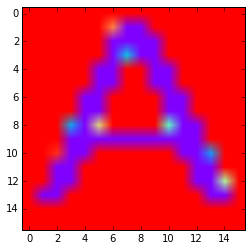

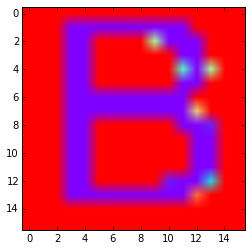

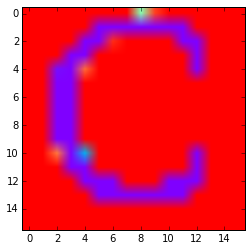

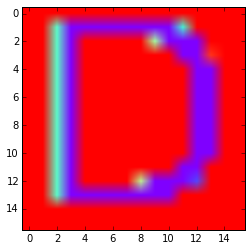

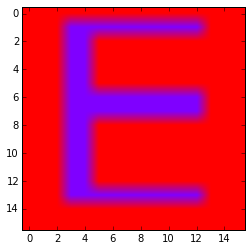

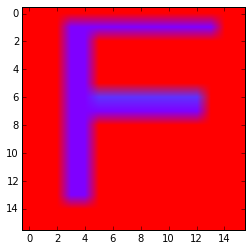

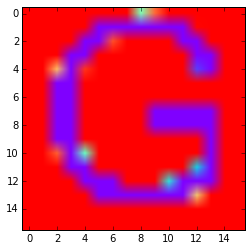

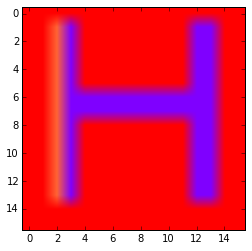

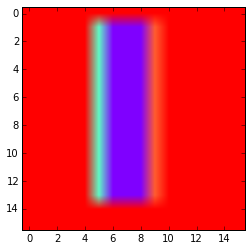

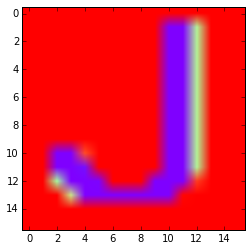

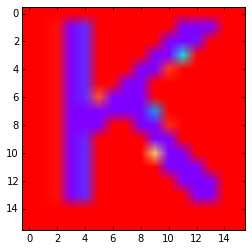

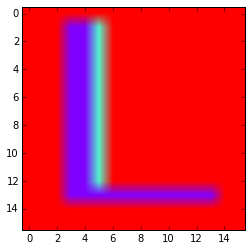

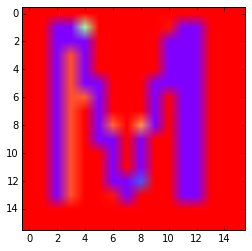

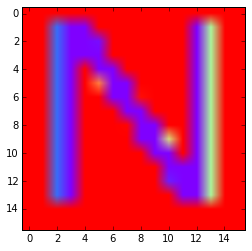

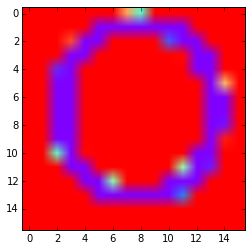

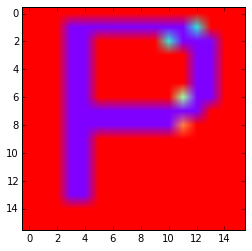

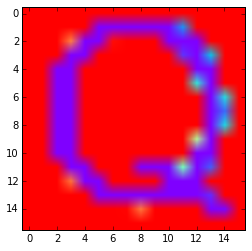

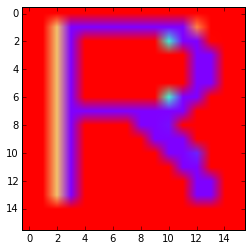

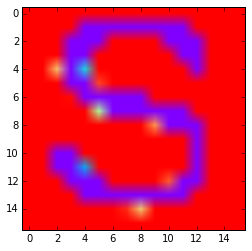

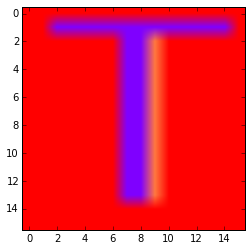

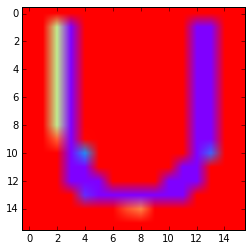

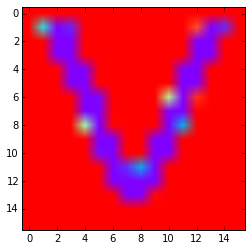

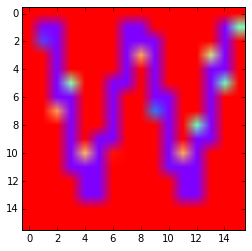

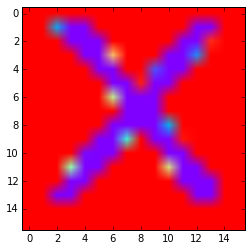

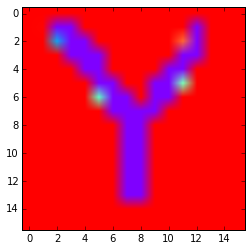

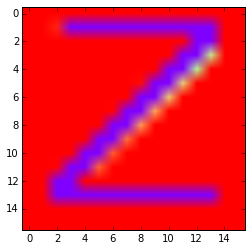

[[ 0.22585784  0.22585784  0.22585784 ...,  0.22585784  0.22585784
   0.22585784]
 [ 0.29873536  0.29873536  0.29873536 ...,  0.29873536  0.29873536
   0.29873536]
 [ 0.1822355   0.1822355   0.1822355  ...,  0.1822355   0.1822355
   0.1822355 ]
 ..., 
 [ 0.22815053  0.22815053  0.22815053 ...,  0.22815053  0.22815053
   0.22815053]
 [ 0.16012221  0.16012221  0.16012221 ...,  0.16012221  0.16012221
   0.16012221]
 [ 0.18447815  0.18447815  0.18447815 ...,  0.18447815  0.18447815
   0.18447815]]


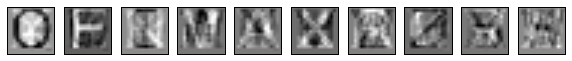

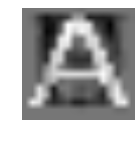

In [142]:
%matplotlib inline 

'''
hw_08 
'''

import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp2d
from sklearn.decomposition import PCA

#Image Preparation

#####################################################################

#1.Display image (pyplot.imshow()) and crop the image and remove the narrow band if it appears

def auto_crop(letter): #crops any black vertical block at the end of an images right hand side
    pix_lst = []       #returns where the black block starts horizontally
    #print 'letter array:', letter[0,:]
    #print len(letter[0,:])
    for index in np.arange(len(letter[0,:])): 
        pixel = letter[0,index]
        if index < 80: #most bars don't come until later. shortens runtime
            continue
        if pixel == 0.0:
            pix_lst.append(index)
            
    #print 'pix_lst:',pix_lst
    if pix_lst == []: #helps with special case where there is no black bar
        return len(letter[0,:])
    if len(pix_lst) == 1: #remedies letters with very small black bars
        return pix_lst[0]
    
    start = 0
    end = 0
    
    for ind in np.arange(1,len(pix_lst)):
        pix1 = pix_lst[ind-1]
        pix2 = pix_lst[ind]
        if abs((pix2-pix1)) >= 1:
            start = pix2 - 1
        #print 'Start:', start
        return start
    
def make_let_im(let_file, dim = 16, y_lo = 70, y_hi = 215, x_lo =10,\
                x_hi = 200, plot_let = False):

    #print str(let_file)
    letter = mpimg.imread('letter'+str(let_file)+'.png')
    letter_red = letter[:,:,0]
    #print 'shape:', (letter_red.shape)

    letter_cropped = letter_red[ylo:yhi,x_lo:x_hi] #crops the max and min y dimensions
    letter_cropped[:,(auto_crop(letter_cropped)):] = 1 #use auto_crop to get rid of black band
    #print (letter_cropped.shape)
    
    
#alter this code to resample this image to 16x16 image

    # Note the 0th dimension is y, and 1st dimension is x -- silly convention!
    x = np.arange(letter_cropped.shape[1])
    y = np.arange(letter_cropped.shape[0])

    f2d = interp2d(x, y, letter_cropped)

    x_new = np.linspace(0, letter_cropped.shape[1], dim)
    y_new = np.linspace(0, letter_cropped.shape[0], dim)

    let_crop_new = f2d(x_new, y_new)

    
#sums all points of image, then averages
    pix_sum = 0
    number = 0
    for x in range(len(let_crop_new[0,:])): 
        for y in range(len(let_crop_new[:,0])):
            pix_sum += let_crop_new[x,y]
            number +=1.
    
    mean_image = pix_sum/number
    let_new_new = let_crop_new - mean_image

    if plot_let == True:
        plt.imshow(let_new_new, cmap = 'rainbow')
        plt.grid('off')
        plt.show()
    
    return let_new_new, np.array([let_new_new.flatten()])

letter_lst = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
for letter in letter_lst:
    make_let_im(letter, plot_let = True)

#####################################################################

#2. Data Array Construction

X = np.zeros((26,256))
letter_lst = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

for ind in range(len(empty_arr[:,0])): #adds each array to empty 26x256 
    let_new_new_flat = make_let_im(letter_lst[ind])[1]
    X[ind, :] = let_new_new_flat

print X   

#####################################################################

#3. Principal Component Analysis

def alphabet_pca(X, n_comp = 10):
    # project from 64 to n dimensions
    pca = PCA(n_comp)  
    Xproj = pca.fit_transform(X)
    pca_comps = pca.components_
    return pca, Xproj, pca_comps

pca, Xproj, pca_comps = alphabet_pca(X)
    
def show_pca_im(Xproj, pca_comps, dim = 16, let_idx = 0, n_comp = 10):
    f, axes = plt.subplots(1, n_comp, figsize = (10, 2), subplot_kw=dict(xticks=[], yticks=[]))
    for i in range(n_comp):
        axes[i].imshow(pca_comps[i].reshape((dim, dim)), cmap='binary')

    let_im = np.zeros((dim, dim))
    coeffs = Xproj[let_idx]

    
    for i in range(n_comp):
        let_im += coeffs[i]*pca_comps[i].reshape((dim, dim))

    fig, ax = plt.subplots(1, 1, figsize = (2, 2))
    ax.imshow(let_im, cmap='binary')
    # To turn off grid (under seaborn, the default for grid is on.)
    ax.grid(False)
    ax.axis('off')
    plt.show()

show_pca_im(Xproj, pca_comps)

#####################################################################




